# Understanding the dataset

In [22]:
import pandas as pd

# Load the Crop Dataset
crop_df = pd.read_csv("crop_data.csv")

# Load the Weather Dataset
weather_df = pd.read_csv("weather_data.csv")


In [23]:
# Display the first few rows of both datasets
print("Crop Data Sample:")
print(crop_df.head())
print("\n Weather Data Sample:")
print(weather_df.head())


Crop Data Sample:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

 Weather Data Sample:
   Unnamed: 0  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
0           0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98   
1           1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05   
2           2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63   
3           3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73   
4           4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47   

     SEP    OCT    NOV    DEC  
0  26.26  25.08  21.73  18.95  
1  25.95  24.37  21.33  

In [24]:
# Check for missing values
print("\n Missing Values in Crop Data:")
print(crop_df.isnull().sum())

print("\n Missing Values in Weather Data:")
print(weather_df.isnull().sum())



 Missing Values in Crop Data:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

 Missing Values in Weather Data:
Unnamed: 0    0
YEAR          0
JAN           0
FEB           0
MAR           0
APR           0
MAY           0
JUN           0
JUL           0
AUG           0
SEP           0
OCT           0
NOV           0
DEC           0
dtype: int64


In [25]:
# Get summary statistics
print("\n Crop Data Summary:")
print(crop_df.describe())

print("\n Weather Data Summary:")
print(weather_df.describe())



 Crop Data Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  

 Weat

In [26]:
# Display column names to understand the structure
print("\n Crop Data Columns:", crop_df.columns)
print(" Weather Data Columns:", weather_df.columns)



 Crop Data Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
 Weather Data Columns: Index(['Unnamed: 0', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')


In [27]:
# Drop the 'Unnamed: 0' column
weather_df = weather_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Verify if the column is removed
print("Updated Weather Data Columns:", weather_df.columns)

Updated Weather Data Columns: Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')


# Data Preprocessing

In [28]:

# Load datasets
crop_data = pd.read_csv("crop_data.csv")  # Adjust filename as needed
weather_data = pd.read_csv("weather_data.csv")

# Compute average temperature for each year
weather_data["Avg_Temperature"] = weather_data.iloc[:, 2:].mean(axis=1)

# Select the latest year
latest_year = weather_data["YEAR"].max()
latest_weather = weather_data[weather_data["YEAR"] == latest_year][["Avg_Temperature"]]

# Ensure it's correctly extracted
print(f"Latest year: {latest_year}")
print(f"Avg Temperature: {latest_weather.values}")

# Merge: Assign latest temperature to all crop records
crop_data["Avg_Temperature"] = latest_weather["Avg_Temperature"].values[0]

# Save and check
crop_data.to_csv("preprocessed_crop_data.csv", index=False)
print(crop_data.head())


Latest year: 2017
Avg Temperature: [[26.29166667]]
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   Avg_Temperature  
0        26.291667  
1        26.291667  
2        26.291667  
3        26.291667  
4        26.291667  


In [29]:
print(crop_data["Avg_Temperature"].describe())  # Check min, max, mean


count    2.200000e+03
mean     2.629167e+01
std      7.746677e-13
min      2.629167e+01
25%      2.629167e+01
50%      2.629167e+01
75%      2.629167e+01
max      2.629167e+01
Name: Avg_Temperature, dtype: float64


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]  # Exclude 'Avg_Temperature'
crop_data[columns_to_scale] = scaler.fit_transform(crop_data[columns_to_scale])


In [31]:
print(crop_data.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

  label  Avg_Temperature  
0  rice        26.291667  
1  rice        26.291667  
2  rice        26.291667  
3  rice        26.291667  
4  rice        26.291667  


# EDA

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

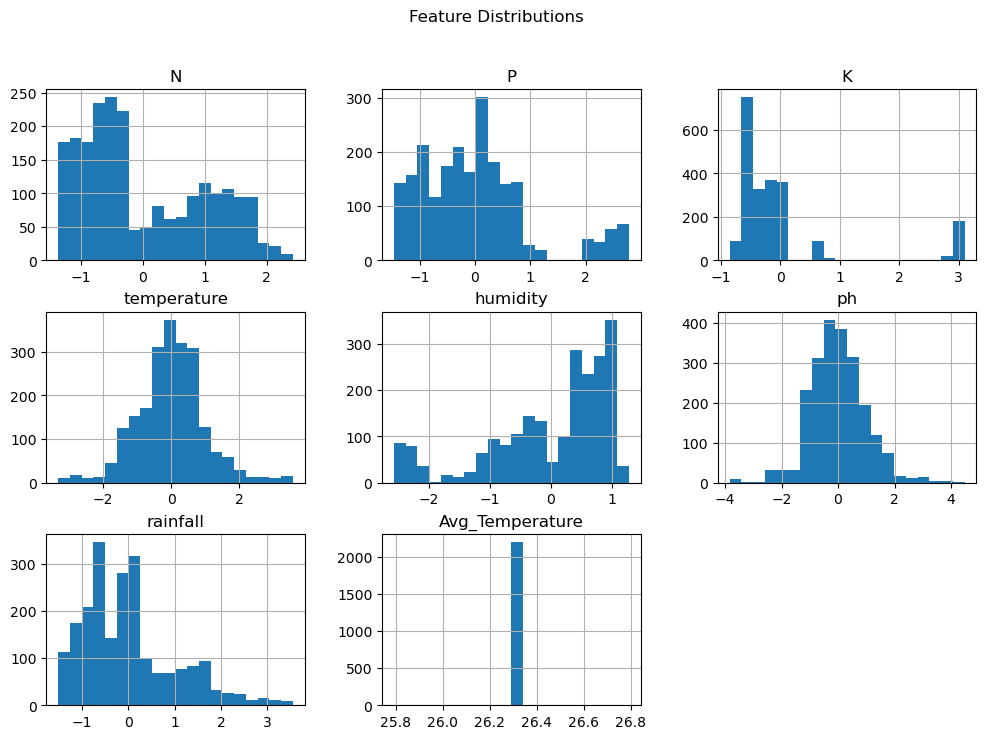

In [34]:
# Univariate Analysis: Histograms
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Avg_Temperature']
crop_data[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

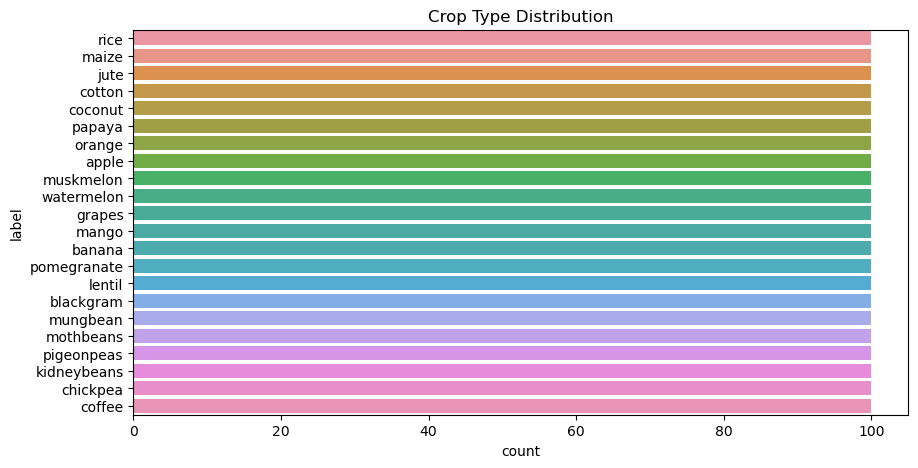

In [35]:
# Univariate Analysis: Count of crop labels
plt.figure(figsize=(10, 5))
sns.countplot(y=crop_data['label'], order=crop_data['label'].value_counts().index)
plt.title("Crop Type Distribution")
plt.show()

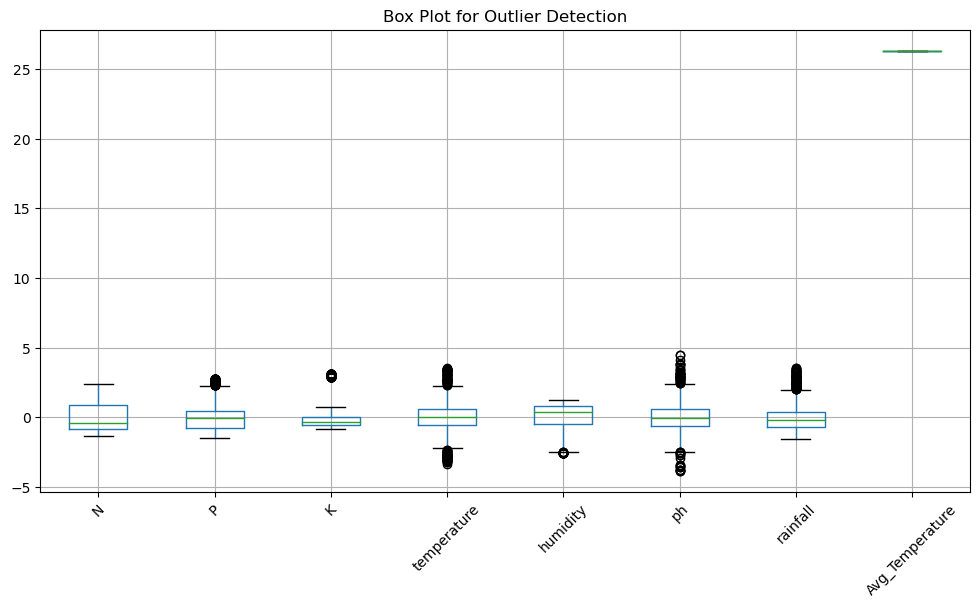

In [37]:
# Box plots for Outlier Detection
plt.figure(figsize=(12, 6))
crop_data[num_cols].boxplot(rot=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


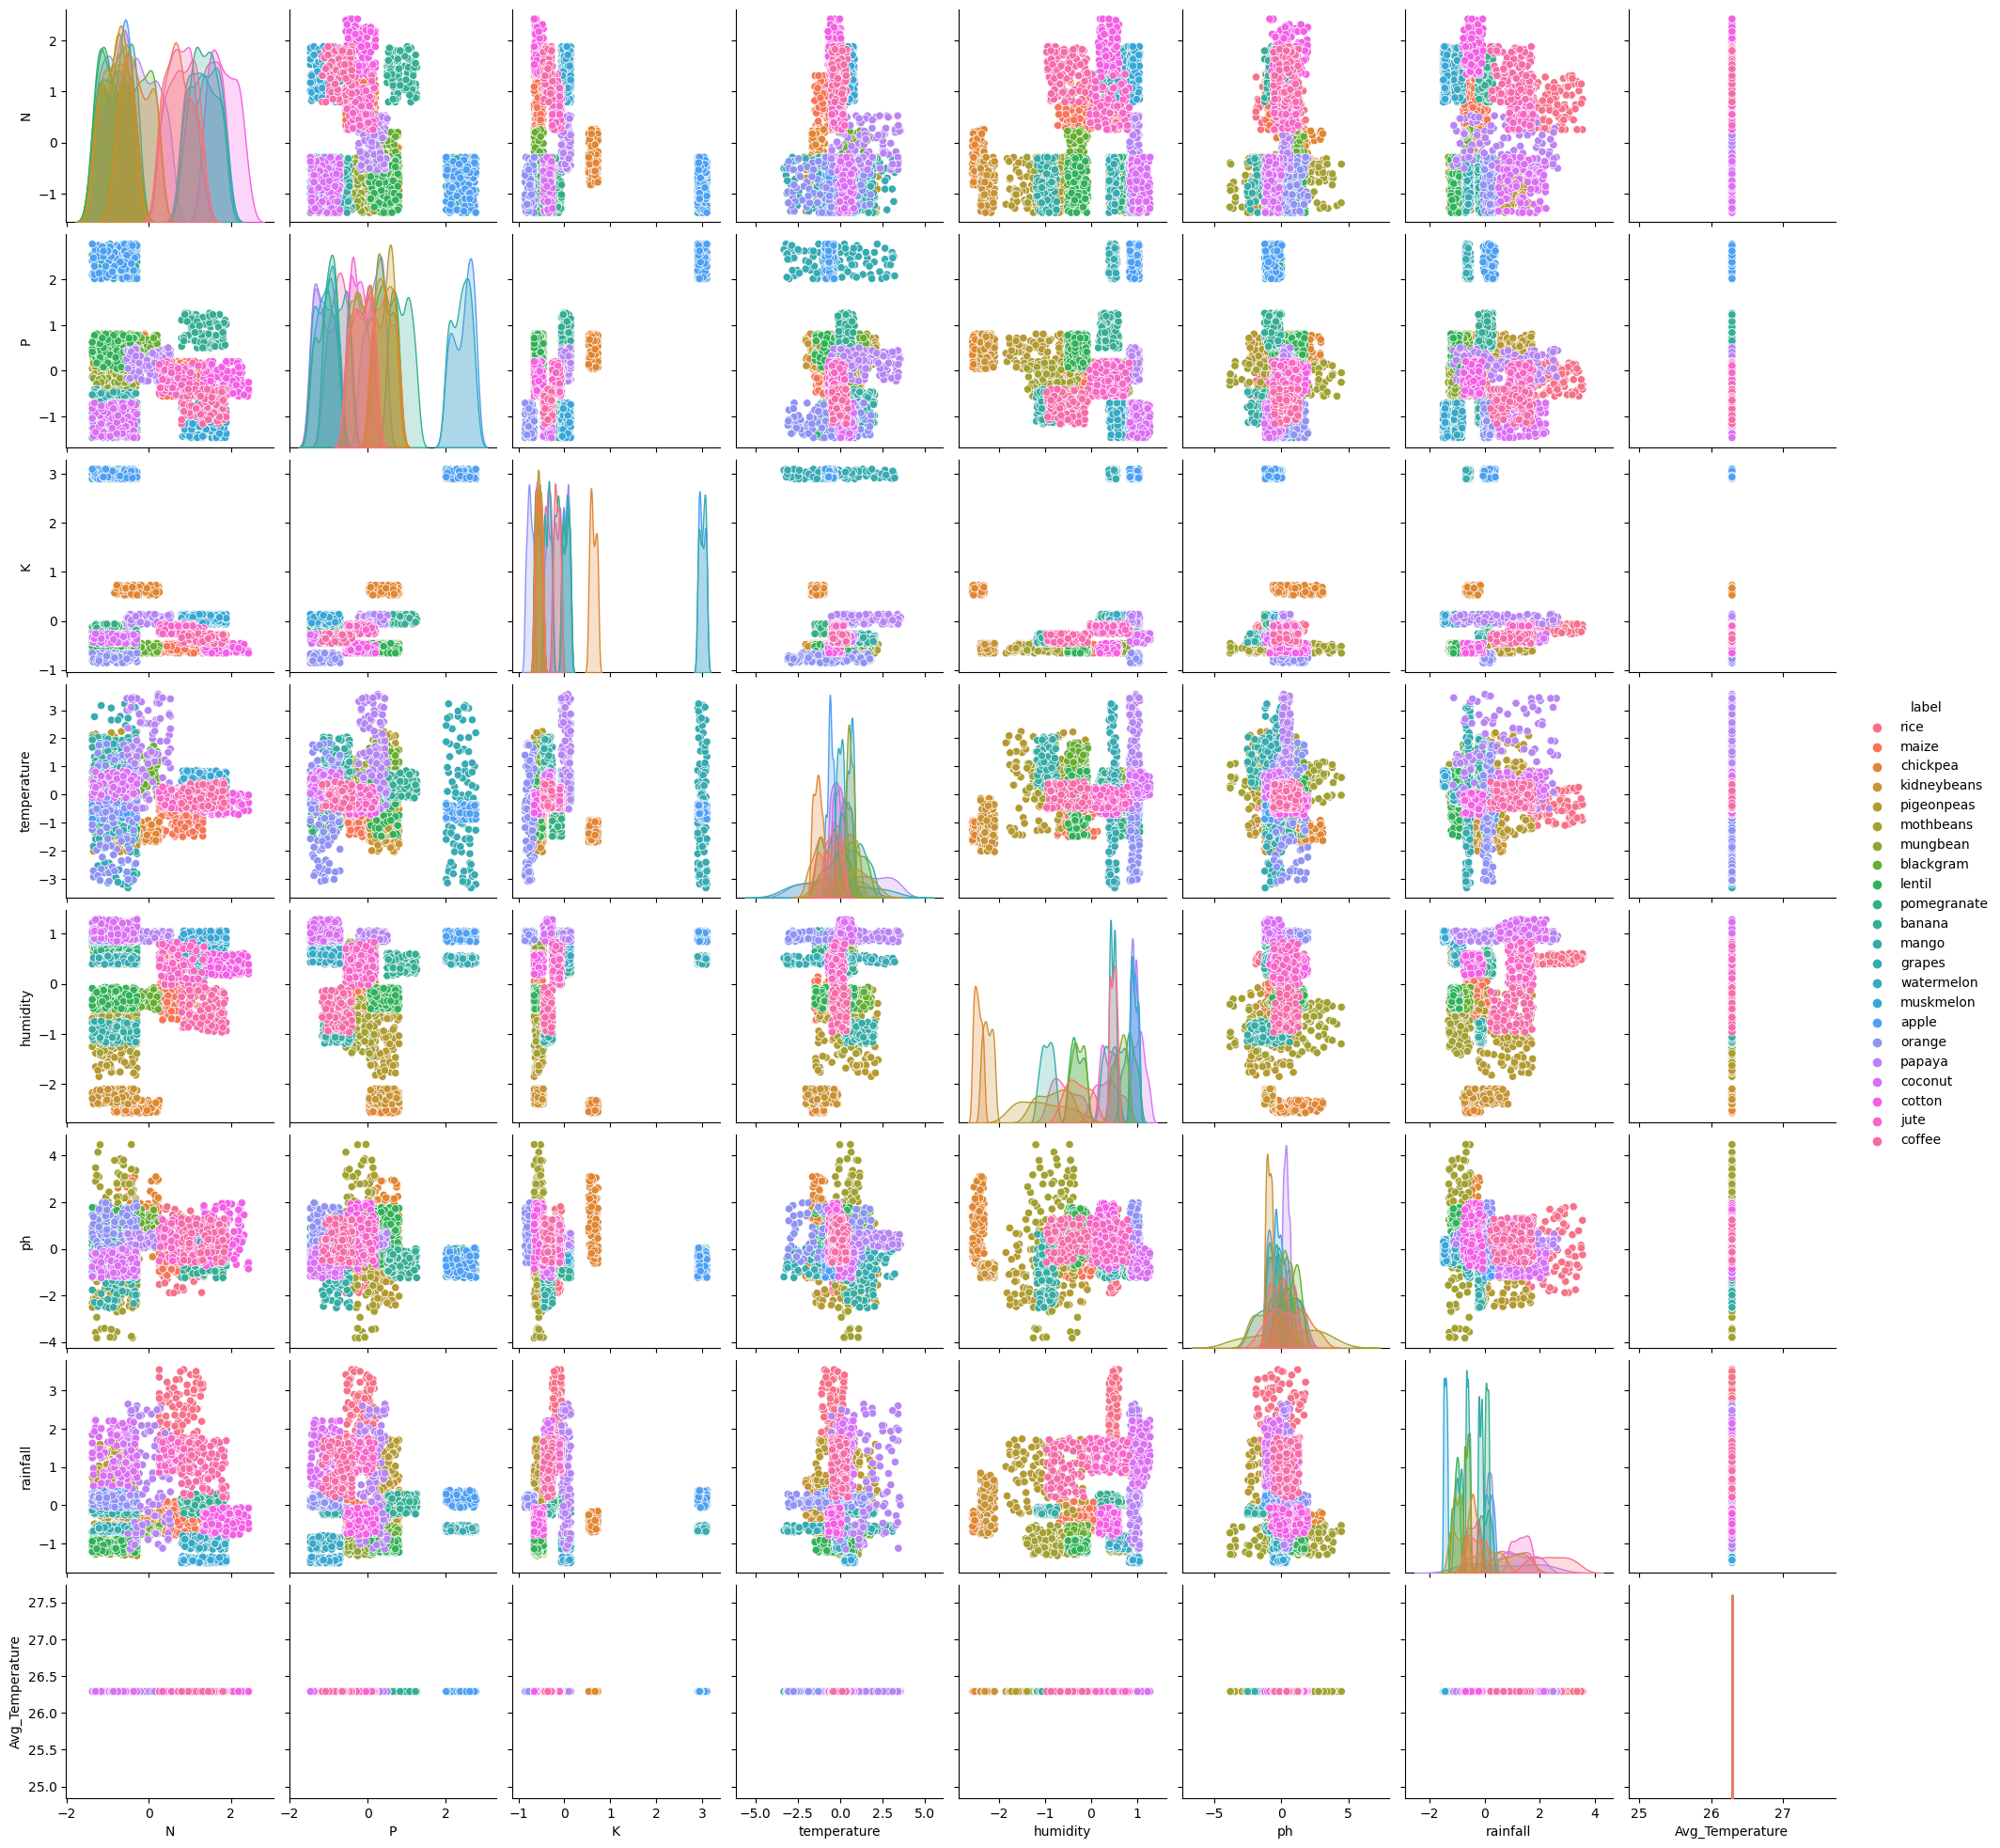

In [42]:
# Pairplot for Feature Relationships
sns.pairplot(crop_data, hue='label', diag_kind='kde', markers="o")
plt.show()

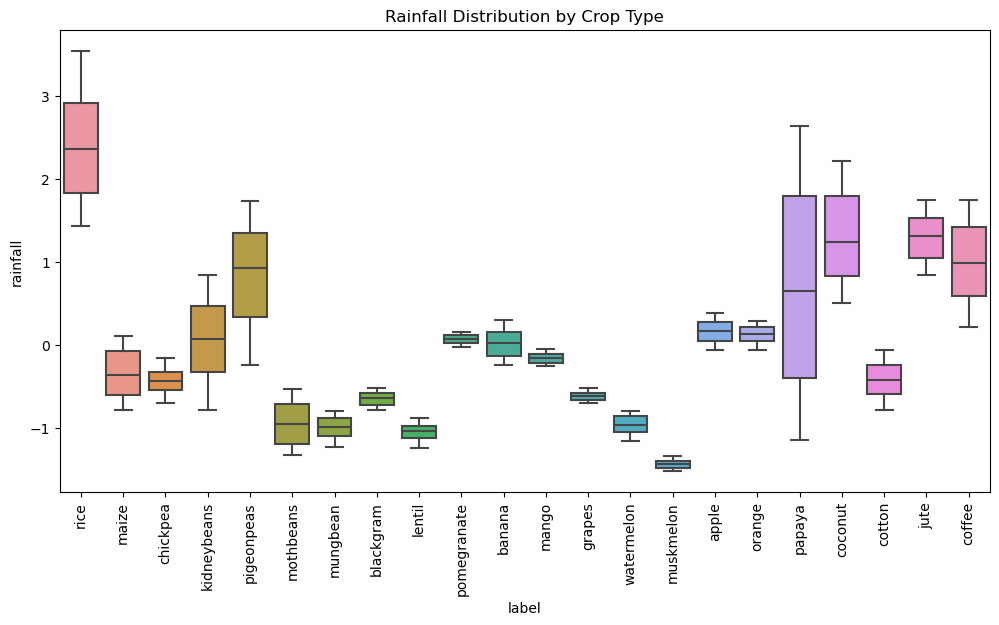

In [43]:
# Additional Analysis: Rainfall vs Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=crop_data)
plt.xticks(rotation=90)
plt.title("Rainfall Distribution by Crop Type")
plt.show()

### This distribution tells us how much rainfall is required to each crop

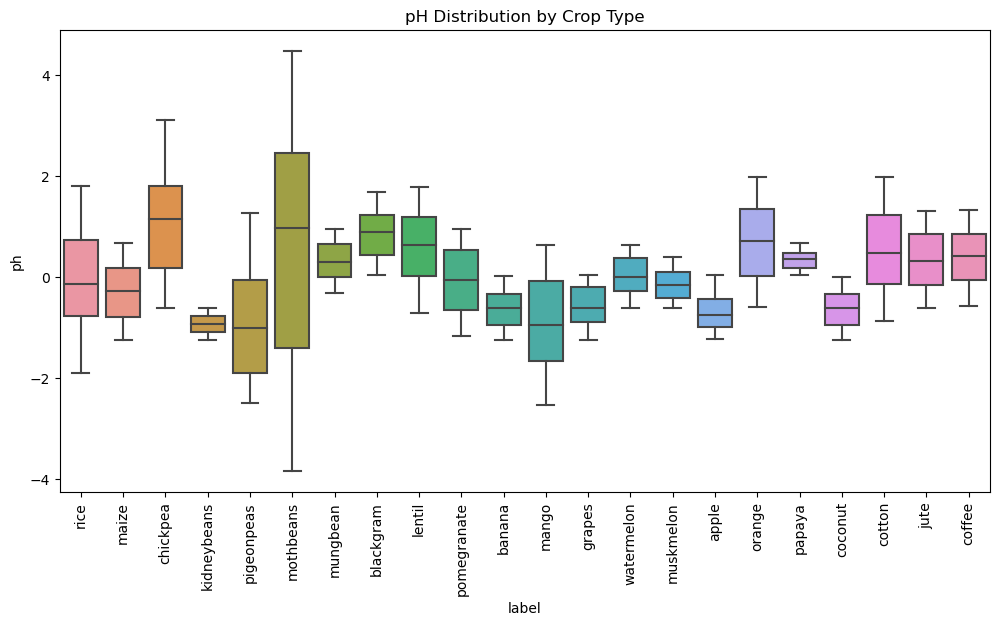

In [44]:
# pH vs Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='ph', data=crop_data)
plt.xticks(rotation=90)
plt.title("pH Distribution by Crop Type")
plt.show()


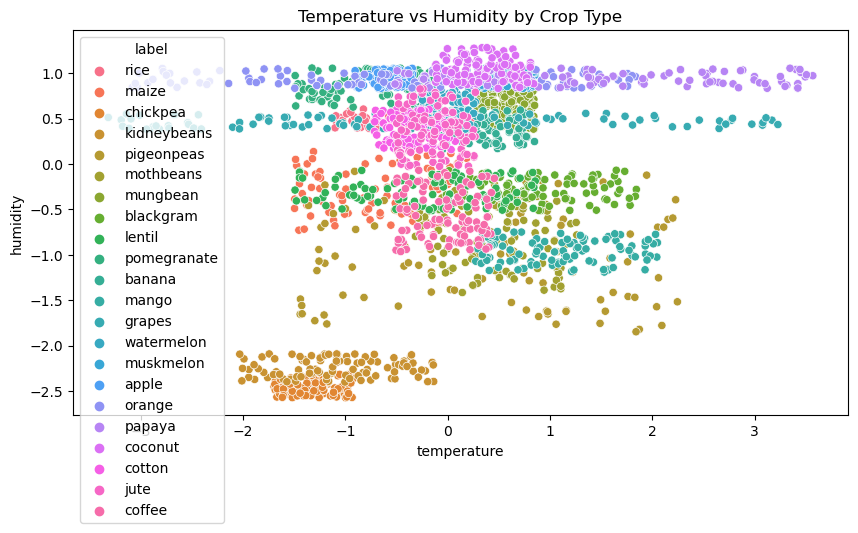

In [45]:
# Temperature vs Humidity
plt.figure(figsize=(10, 5))
sns.scatterplot(x=crop_data['temperature'], y=crop_data['humidity'], hue=crop_data['label'])
plt.title("Temperature vs Humidity by Crop Type")
plt.show()


# Model Building

In [46]:
X = crop_data.drop(columns=['label'])  # Features
y = crop_data['label']  # Target variable


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9727
Decision Tree Accuracy: 0.9841
Random Forest Accuracy: 0.9955


### Random forest has maximum accuracy hence we select it

# Model Evaluation (Testing)

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train the best model again
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Now, we can use 'random_forest' for predictions
y_pred = random_forest.predict(X_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy on Test Data: 0.9977

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange 

In [56]:

# Get feature importances from the trained Random Forest model
importances = random_forest.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns  # Assuming X_train is your training dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df)


           Feature  Importance
4         humidity    0.211649
6         rainfall    0.206673
2                K    0.182996
1                P    0.150806
0                N    0.107074
3      temperature    0.083569
5               ph    0.057234
7  Avg_Temperature    0.000000


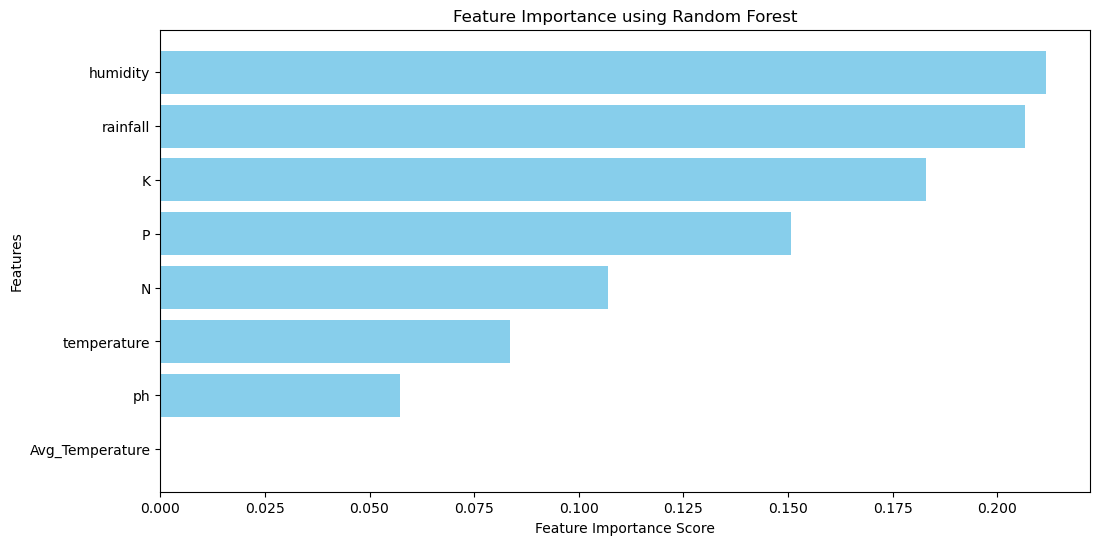

In [57]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

# Predicting Crops Based on Features

In [60]:
# Example new data (replace with actual values)
new_data = [[50, 30, 40, 25.5, 80, 6.5, 200, 26]]  # [N, P, K, temperature, humidity, ph, rainfall, Avg_Temperature]

# Predict the class
predicted_crop = random_forest.predict(new_data)
print("Predicted Crop:", predicted_crop[0])

C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Crop: apple


# Model Deployment

### CLI based Deployment

In [65]:
# Define feature names (must match training features)
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Avg_Temperature']

# Get user inputs
N = float(input("Enter Nitrogen level (N): "))
P = float(input("Enter Phosphorus level (P): "))
K = float(input("Enter Potassium level (K): "))
temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
ph = float(input("Enter pH: "))
rainfall = float(input("Enter Rainfall: "))

# Set Avg_Temperature to 0 
Avg_Temperature = 0 

# Convert input to DataFrame
user_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall, Avg_Temperature]], columns=feature_names)

# Predict the crop
predicted_crop = random_forest.predict(user_data)
print(f"\nPredicted Crop: {predicted_crop[0]}")


Enter Nitrogen level (N): 100
Enter Phosphorus level (P): 90
Enter Potassium level (K): 70
Enter Temperature: 35
Enter Humidity: 100
Enter pH: 6
Enter Rainfall: 300

Predicted Crop: apple


### IPYwidgets

In [68]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier

# Define feature names (must match training features)
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Avg_Temperature']

# Create input widgets
N_widget = widgets.FloatText(description="N (Nitrogen)")
P_widget = widgets.FloatText(description="P (Phosphorus)")
K_widget = widgets.FloatText(description="K (Potassium)")
temperature_widget = widgets.FloatText(description="Temperature")
humidity_widget = widgets.FloatText(description="Humidity")
ph_widget = widgets.FloatText(description="pH")
rainfall_widget = widgets.FloatText(description="Rainfall")

# Avg_Temperature is included but set to a default value (0 or dataset average)
Avg_Temperature = 0  # You can change this to an average value if available

# Prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create DataFrame for input
    user_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall, Avg_Temperature]], columns=feature_names)
    
    # Make prediction
    predicted_crop = random_forest.predict(user_data)[0]
    print(f"\n🌾 **Predicted Crop:** {predicted_crop}")

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Crop")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        predict_crop(N_widget.value, P_widget.value, K_widget.value, 
                     temperature_widget.value, humidity_widget.value, 
                     ph_widget.value, rainfall_widget.value)

predict_button.on_click(on_button_click)

# Display widgets
display(N_widget, P_widget, K_widget, temperature_widget, humidity_widget, ph_widget, rainfall_widget, predict_button, output)


FloatText(value=0.0, description='N (Nitrogen)')

FloatText(value=0.0, description='P (Phosphorus)')

FloatText(value=0.0, description='K (Potassium)')

FloatText(value=0.0, description='Temperature')

FloatText(value=0.0, description='Humidity')

FloatText(value=0.0, description='pH')

FloatText(value=0.0, description='Rainfall')

Button(description='Predict Crop', style=ButtonStyle())

Output()

In [69]:
!pip install ipywidgets gradio streamlit


  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/f6/78/ab8ba3ccc03f83027380ca13d0d741844eb9a6f7ad02a835c353949223e8/gradio-5.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/ad/dc/69068179e09488d0833a970d06e8bf40e35669a7bddb8a3caadc13b7dff4/streamlit-1.42.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fastapi<1.0,>=0.115.2 from https://files.pythonhosted.org/packages/8f/7d/2d6ce181d7a5f51dedb8c06206cbf0ec026a99bf145edd309f9e17c3282f/fastapi-0.115.8-py3-none-any.whl.metadata
  Obtaining dependency information for ffmpy from https://files.pythonhosted.org/packages/53/5d/65f40bd333463b3230b3a72d93873caaf49b0cbb5228598fafb75fcc5357/ffmpy-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gradio-client==1.7.0 from https://files.pythonhosted.org/packages/f3/c1/def2bd93b8beab342c443bf5ac47f85e48b78eca010bbff51d6978472a3f/gradio_clien

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anaconda\\Lib\\site-packages\\~ydantic\\annotated_types.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [71]:
!pip install gradio

  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/f6/78/ab8ba3ccc03f83027380ca13d0d741844eb9a6f7ad02a835c353949223e8/gradio-5.16.0-py3-none-any.whl.metadata
  Using cached gradio-5.16.0-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for fastapi<1.0,>=0.115.2 from https://files.pythonhosted.org/packages/8f/7d/2d6ce181d7a5f51dedb8c06206cbf0ec026a99bf145edd309f9e17c3282f/fastapi-0.115.8-py3-none-any.whl.metadata
  Using cached fastapi-0.115.8-py3-none-any.whl.metadata (27 kB)
  Obtaining dependency information for gradio-client==1.7.0 from https://files.pythonhosted.org/packages/f3/c1/def2bd93b8beab342c443bf5ac47f85e48b78eca010bbff51d6978472a3f/gradio_client-1.7.0-py3-none-any.whl.metadata
  Using cached gradio_client-1.7.0-py3-none-any.whl.metadata (7.1 kB)
  Obtaining dependency information for httpx>=0.24.1 from https://files.pythonhosted.org/packages/2a/39/e50c7c3a983047577ee07d2a9e53faf5a69493943ec3f6a384bdc792deb2/httpx-

In [72]:
import gradio as gr
print("Gradio is installed successfully!")

Gradio is installed successfully!


In [74]:

# Function for Gradio
def gradio_predict(N, P, K, temperature, humidity, ph, rainfall, avg_temp):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall, avg_temp]])
    prediction = random_forest.predict(input_data)[0]
    return f"Recommended Crop: {prediction}"

# Creating Gradio Interface
gradio_interface = gr.Interface(
    fn=gradio_predict,
    inputs=[gr.Number(label="Nitrogen (N)"), gr.Number(label="Phosphorus (P)"),
            gr.Number(label="Potassium (K)"), gr.Number(label="Temperature (°C)"),
            gr.Number(label="Humidity (%)"), gr.Number(label="pH"),
            gr.Number(label="Rainfall (mm)"), gr.Number(label="Avg Temperature (°C)")],
    outputs="text"
)

# Launch Gradio
gradio_interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://49ed3bdaad5f7ab751.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
import pickle

# Save the trained model
with open('Crop_recommendation_system_ML.pkl', 'wb') as model_file:
    pickle.dump(random_forest, model_file)

print("Model saved successfully!")


Model saved successfully!
